In [6]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sys.path.append("C:/Users/44756/Documents/Postgrad/DSA8030/Data/")

In [ ]:
# Import and preview raw dataset, though making zip code a string
init_data = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/realtor-data.csv", dtype = {'zip_code':'string'})
init_data

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,00601,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,00601,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,00795,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,00731,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,00680,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354,933.0,2022-03-24


In [ ]:
# Check data type for each variable
init_data.dtypes

brokered_by              float64
status                    object
price                    float64
bed                      float64
bath                     float64
acre_lot                 float64
street                   float64
city                      object
state                     object
zip_code          string[python]
house_size               float64
prev_sold_date            object
dtype: object

In [34]:
init_data.describe()

,brokered_by,price,bed,bath,acre_lot,street,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,1.040400e+09


In [ ]:
# Check frequencies of sale status within data
init_data.value_counts(subset = 'status')
# Working with 'sold' houses allows us to use probably the most accurate data, and with >812000 entries, we have a sufficient number of them.

status
for_sale          1389306
sold               812009
ready_to_build      25067
Name: count, dtype: int64

In [ ]:
# Check missingness counts for different variables among sold houses.
init_data[init_data.status == 'sold'].isnull().sum()
# There is a small number of houses with price missing. Since imputing the target variable isn't generally advised, we will remove that very small proportion.
# We will consider other variables during the proper cleaning stage.

brokered_by         3020
status                 0
price                245
bed                69974
bath               77929
acre_lot          107622
street              2277
city                  98
state                  0
zip_code              12
house_size        103710
prev_sold_date         0
dtype: int64

In [20]:
sold = init_data[init_data.price.notna() & (init_data.status == 'sold')]
sold

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1414373,62066.0,sold,77500.0,3.0,1.0,NaN,1072625.0,Ponce,Puerto Rico,00717,957.0,2021-11-29
1414374,72457.0,sold,524900.0,3.0,2.0,0.09,1850809.0,Aguada,Puerto Rico,00602,2200.0,2021-12-13
1414375,48586.0,sold,175000.0,NaN,NaN,0.14,1139965.0,Aguadilla,Puerto Rico,00603,3200.0,2021-11-29
1414376,61711.0,sold,90000.0,3.0,2.0,0.08,141421.0,Aguadilla,Puerto Rico,00603,1421.0,2021-10-19
1414377,49592.0,sold,22500.0,2.0,1.0,0.32,1889894.0,Anasco,Puerto Rico,00610,850.0,2021-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354,933.0,2022-03-24


In [ ]:
# Filter for sold houses with prev_sold_date of the form 1###-##-## or 2###-##-## to remove erroneous dates
sold_valdate = sold[sold.prev_sold_date.str.match('^[12][0-9]{3}-[0-9]{2}-[0-9]{2}')]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1414373,62066.0,sold,77500.0,3.0,1.0,NaN,1072625.0,Ponce,Puerto Rico,00717,957.0,2021-11-29
1414374,72457.0,sold,524900.0,3.0,2.0,0.09,1850809.0,Aguada,Puerto Rico,00602,2200.0,2021-12-13
1414375,48586.0,sold,175000.0,NaN,NaN,0.14,1139965.0,Aguadilla,Puerto Rico,00603,3200.0,2021-11-29
1414376,61711.0,sold,90000.0,3.0,2.0,0.08,141421.0,Aguadilla,Puerto Rico,00603,1421.0,2021-10-19
1414377,49592.0,sold,22500.0,2.0,1.0,0.32,1889894.0,Anasco,Puerto Rico,00610,850.0,2021-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354,933.0,2022-03-24


In [29]:
# Convert date column to datetime type
sold_valdate.loc[:,'prev_sold_date'] = pd.to_datetime(sold_valdate['prev_sold_date'], format = "%Y-%M-%d")
# Question: This automatically adds a time, will this make a difference?
sold_valdate

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1414373,62066.0,sold,77500.0,3.0,1.0,NaN,1072625.0,Ponce,Puerto Rico,00717,957.0,2021-01-29 00:11:00
1414374,72457.0,sold,524900.0,3.0,2.0,0.09,1850809.0,Aguada,Puerto Rico,00602,2200.0,2021-01-13 00:12:00
1414375,48586.0,sold,175000.0,NaN,NaN,0.14,1139965.0,Aguadilla,Puerto Rico,00603,3200.0,2021-01-29 00:11:00
1414376,61711.0,sold,90000.0,3.0,2.0,0.08,141421.0,Aguadilla,Puerto Rico,00603,1421.0,2021-01-19 00:10:00
1414377,49592.0,sold,22500.0,2.0,1.0,0.32,1889894.0,Anasco,Puerto Rico,00610,850.0,2021-01-30 00:12:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354,3600.0,2022-01-25 00:03:00
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354,1616.0,2022-01-25 00:03:00
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354,3200.0,2022-01-24 00:03:00
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354,933.0,2022-01-24 00:03:00


In [ ]:
# Summary statistics for sold properties.
sold_valdate.describe()

,brokered_by,price,bed,bath,acre_lot,street,house_size,prev_sold_date
count,808988.000000,8.117630e+05,742034.000000,734079.000000,704387.000000,8.097310e+05,708298.000000,812008
mean,52956.632025,4.841722e+05,3.193835,2.394419,12.344141,9.469550e+05,1914.039277,2021-09-26 18:31:23.681589248
min,0.000000,1.000000e+00,1.000000,1.000000,0.000000,5.000000e+00,100.000000,2021-01-01 00:11:00
25%,23573.000000,2.020000e+05,3.000000,2.000000,0.140000,4.747795e+05,1261.000000,2021-01-28 00:12:00
50%,52950.000000,3.449000e+05,3.000000,2.000000,0.210000,9.459750e+05,1680.000000,2022-01-10 00:03:00
75%,79180.000000,5.500000e+05,4.000000,3.000000,0.450000,1.416084e+06,2269.000000,2022-01-21 00:03:00
max,110138.000000,2.950000e+08,444.000000,222.000000,100000.000000,2.001348e+06,933491.000000,2022-01-31 00:03:00
std,30660.765676,7.880800e+05,1.305021,1.156687,773.386695,5.441483e+05,2590.634570,NaN


In [ ]:
# Correlations for sold properties.
sold_valdate.corr(numeric_only = True)

,brokered_by,price,bed,bath,acre_lot,street,house_size
brokered_by,1.000000,-0.016709,0.005200,-0.004899,-0.001812,0.001307,-0.003204
price,-0.016709,1.000000,0.217537,0.378673,0.004242,-0.014772,0.183048
bed,0.005200,0.217537,1.000000,0.646947,0.000454,-0.001233,0.325097
bath,-0.004899,0.378673,0.646947,1.000000,-0.002083,-0.002614,0.388819
acre_lot,-0.001812,0.004242,0.000454,-0.002083,1.000000,-0.000080,0.000389
street,0.001307,-0.014772,-0.001233,-0.002614,-0.000080,1.000000,0.000370
house_size,-0.003204,0.183048,0.325097,0.388819,0.000389,0.000370,1.000000


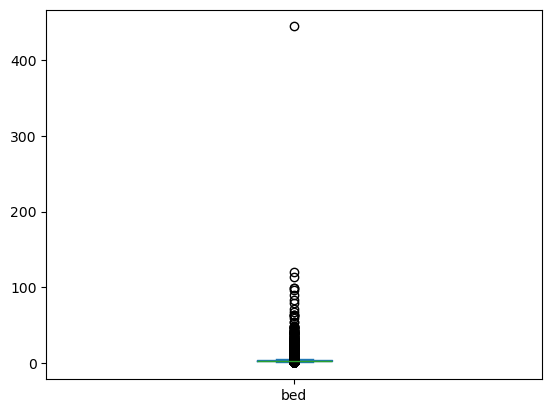

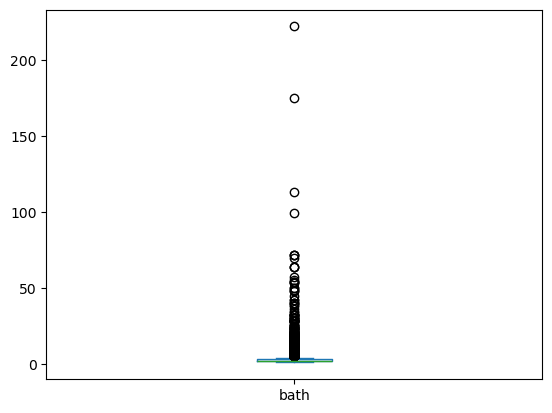

In [ ]:
# Observing outliers in bed/bathroom numbers.
sold_valdate.bed.plot.box()
plt.show()
sold_valdate.bath.plot.box()
plt.show()

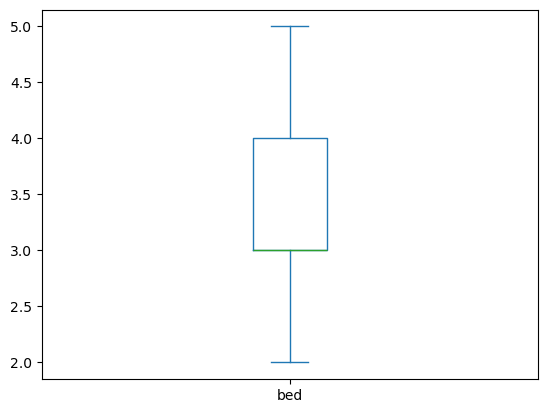

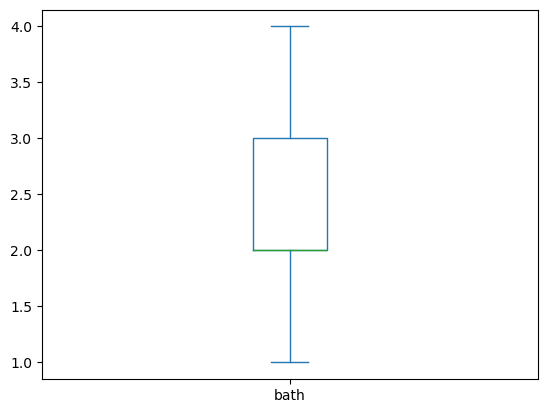

In [ ]:
# Boxplots without outliers for bed/bathroom numbers.
sold_valdate.bed.plot.box(showfliers = False)
plt.show()
sold_valdate.bath.plot.box(showfliers = False)
plt.show()

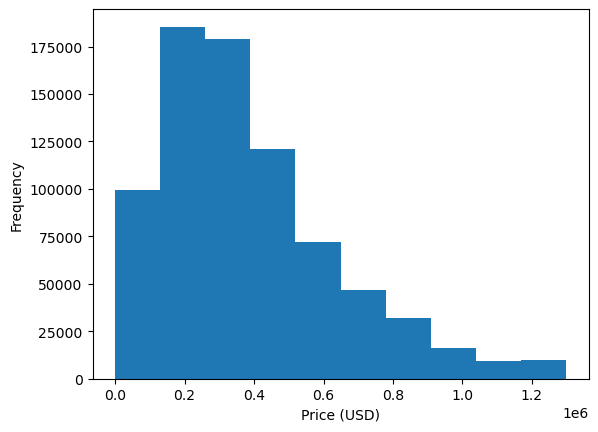

In [72]:
# Histogram of prices with a 95% cutoff

fig, ax = plt.subplots()

ax.hist(sold_valdate[sold_valdate.price <= sold_valdate.price.quantile(0.95)].price)
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Frequency')
plt.show()

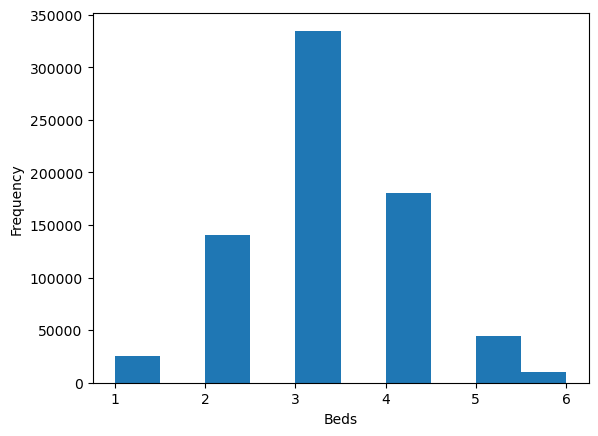

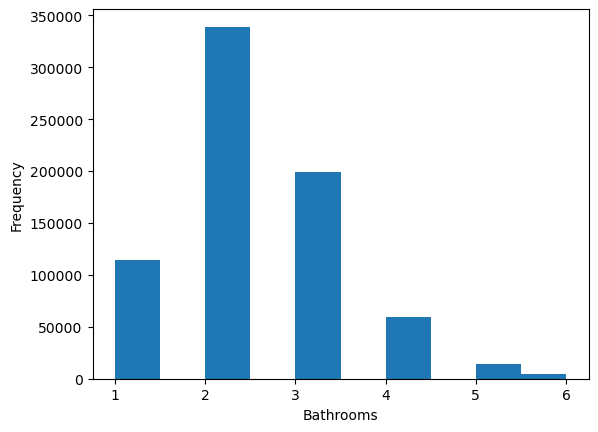

In [ ]:
# Histogram of bed and bathroom numbers with a 99% cutoff

fig, ax = plt.subplots()

ax.hist(sold_valdate[sold_valdate.bed <= sold_valdate.bed.quantile(0.99)].bed)
ax.set_xlabel('Beds')
ax.set_ylabel('Frequency')
plt.show()

fig, ax = plt.subplots()

ax.hist(sold_valdate[sold_valdate.bath <= sold_valdate.bath.quantile(0.99)].bath)
ax.set_xlabel('Bathrooms')
ax.set_ylabel('Frequency')
plt.show()

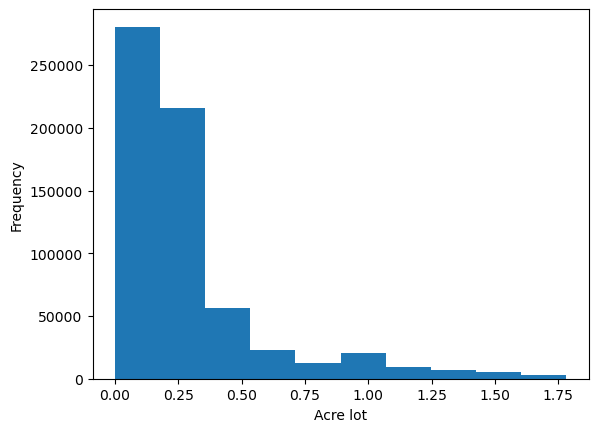

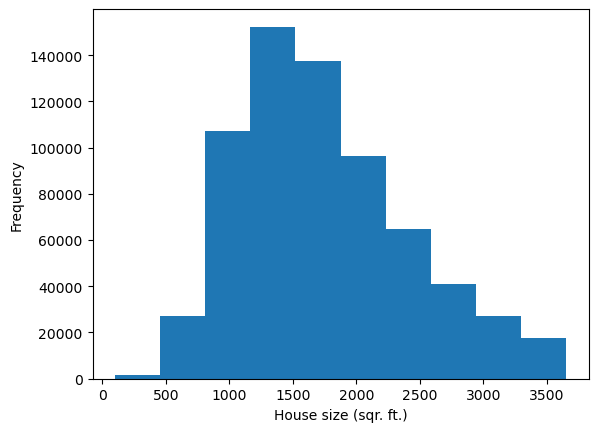

In [76]:
# Histogram of acre lot and house size with a 90% and 95% cutoff respectively

fig, ax = plt.subplots()

ax.hist(sold_valdate[sold_valdate.acre_lot <= sold_valdate.acre_lot.quantile(0.90)].acre_lot)
ax.set_xlabel('Acre lot')
ax.set_ylabel('Frequency')
plt.show()

fig, ax = plt.subplots()

ax.hist(sold_valdate[sold_valdate.house_size <= sold_valdate.house_size.quantile(0.95)].house_size)
ax.set_xlabel('House size (sqr. ft.)')
ax.set_ylabel('Frequency')
plt.show()